# Activity 1.1 : Introduction to Machine Learning 

Objective(s):

This activity aims to introduce how to use the different toolsets  in machine learning.

Intended Learning Outcomes (ILOs):
* Demonstrate how to use different toolsets in machine learning.
* Demonstrate how to import, manipulate and analyze data using pandas and numpy.
* Demonstrate how to visualize data in graphs using matplotlib and seaborn


Resources:
* Jupyter Notebook
* Iris_Data.csv


Procedure:

The iris data set will be used for this activity. It is a well-known data set containing iris species and sepal and petal measurements. 

Import the libraries and the dataset

In [1]:
#import the libraries
import pandas as pd
import numpy as np

# import the dataset
data = pd.read_csv('datasets/Iris_Data (2).csv')
#check the content of the dataframe
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Determine the following:

* The number of data points (rows). 


* The column names. 


* The data types for each column. 

In [168]:
#the number of datapoints
print(data.shape[0])



150


In [169]:
#the column names
print(data.columns.tolist())


['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


In [170]:

#the data types for each column
print(data.dtypes)

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

In [171]:
#remove the 'Iris-' portion of the name
data['species'] = data.species.str.replace('Iris-', '')
data.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Determine the following:
* The number of each species present. 
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

In [172]:
#the number of each species present
data.species.value_counts()

# the mean, median and quartiles and ranges
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean','25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df



,sepal_length,sepal_width,petal_length,petal_width
mean,5.843333,3.054,3.758667,1.198667
25%,5.100000,2.800,1.600000,0.300000
median,5.800000,3.000,4.350000,1.300000
75%,6.400000,3.300,5.100000,1.800000
range,3.600000,2.400,5.900000,2.400000


Calculate the following for each species in a separate dataframe:
* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

In [173]:
# The mean calculation
data.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [174]:
# The median calculation
data.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [175]:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)

{'petal_length': 'max',
 'petal_width': ['mean', 'median'],
 'sepal_length': ['mean', 'median'],
 'sepal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

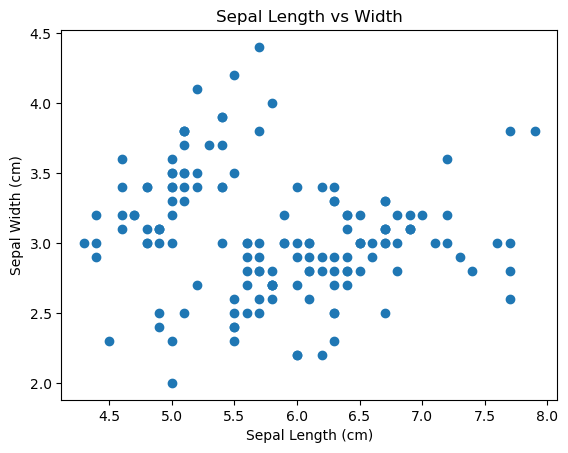

In [176]:
#Scatter plot of sepal_length versus sepal_width using Matplotlib

import matplotlib.pyplot as plt
%matplotlib inline
# A simple scatter plot with Matplotlib
ax = plt.axes()

ax.scatter(data.sepal_length, data.sepal_width)

# Label the axes
ax.set(xlabel='Sepal Length (cm)',
       ylabel='Sepal Width (cm)',
       title='Sepal Length vs Width');


Interpret the result of the scatter plot. 

* In the scatter plot, it can be interpreted that there is no obvious correlation between sepal width and sepal length. Most observations also have a sepal length between 5.5 to 7 centimeters, and sepal width of 2.5 to 3.5 centimeters.

Make a histogram of any one of the four features. Label axes and title it as appropriate. What is the function of the histogram ?

* In my own understanding, histograms are useful in showing the distribution of the data points using intervals or bins. This helps in spotting outliers, determine how varied the data is, and compare subgroups. In some cases, it can also tell about the skewness of the data.

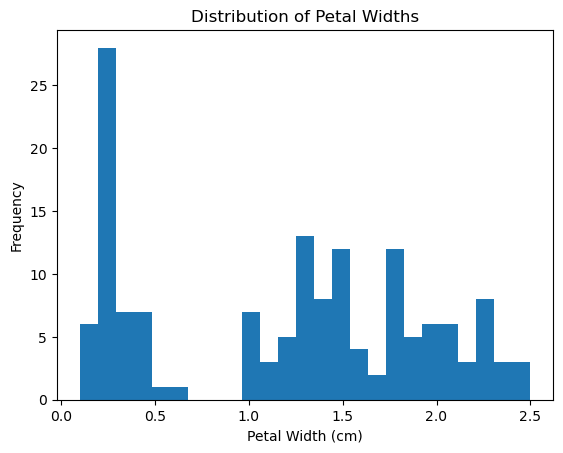

In [179]:
#histogram
ax = plt.axes()
ax.hist(data.petal_width, bins=25);

ax.set(xlabel='Petal Width (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Widths');

Make a boxplot of each petal and sepal measurement. What is the function of the boxplot? 

Boxplots are helpful in summarizing distributions and comparing them. So instead of making individual histograms and making comparisons among them, just make a singular box plots for all the categories you are comparing. 

Boxplots also lets you spot outliers more easily.

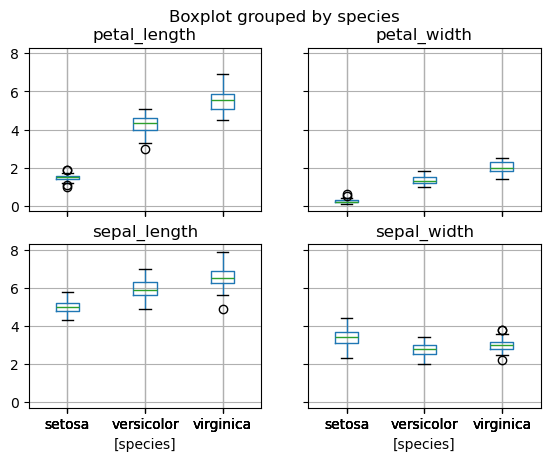

In [181]:
#boxplot
data.boxplot(by='species');

Make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

In [187]:
#single boxplot
plot_data = (data
             .set_index('species')
             .stack()
             .to_frame()
             .reset_index()
             .rename(columns={0:'size', 'level_1':'measurement'})
            )

plot_data.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


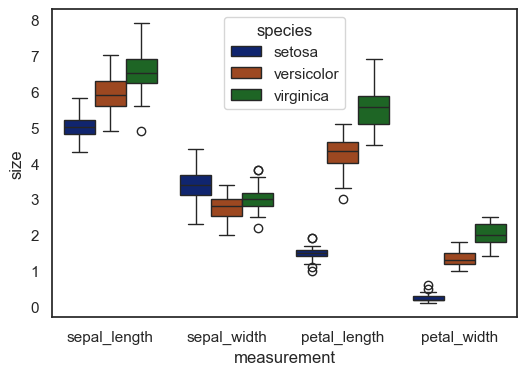

In [182]:
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook')
sns.set_palette('dark')

f = plt.figure(figsize=(6,4))
sns.boxplot(x='measurement', y='size', 
            hue='species', data=plot_data);

Make a pairplot with Seaborn to examine the correlation between each of the measurements. 

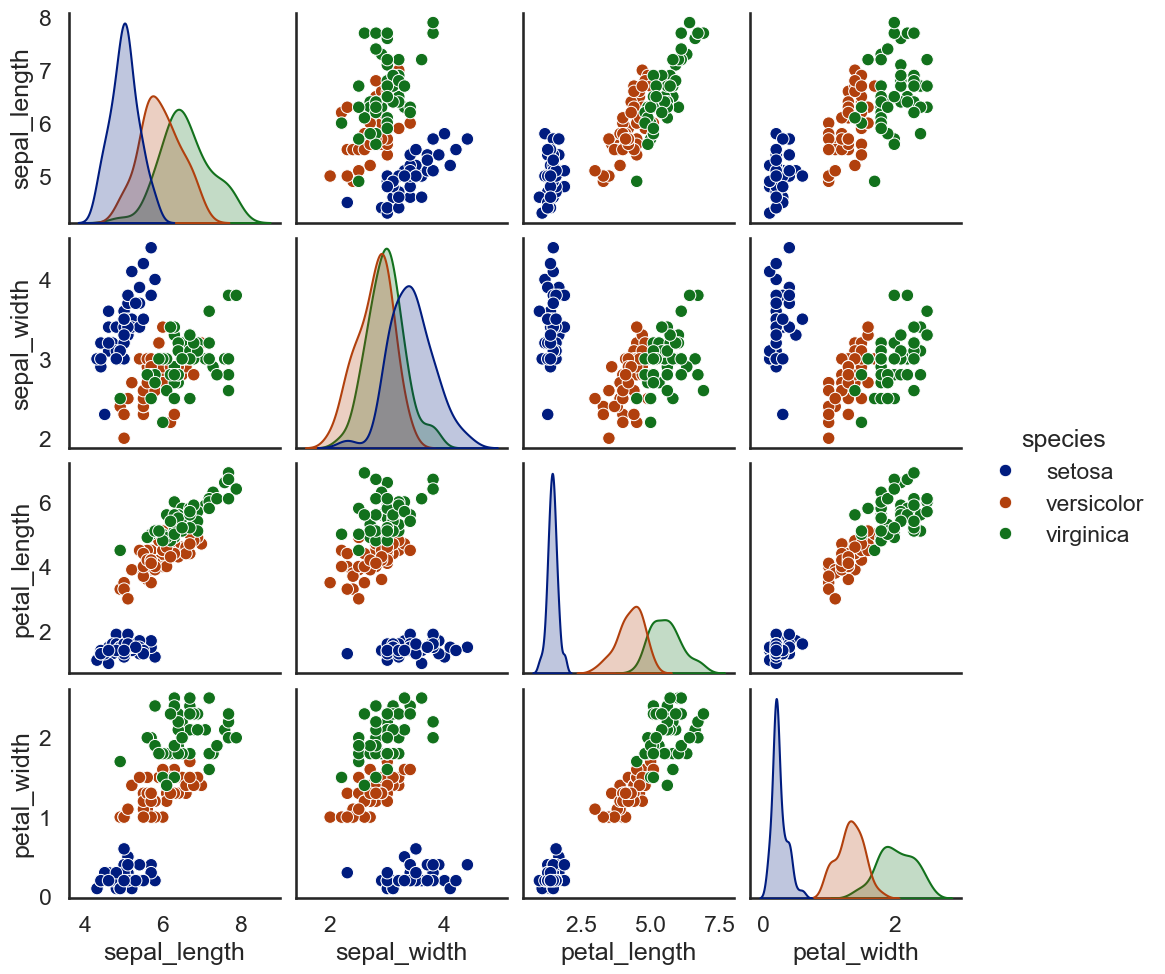

In [186]:
#pair plot
sns.set_context('talk')
sns.pairplot(data, hue='species');


Interpret the result of correlation using the pairplot

There's a positive correlation between petal length and petal width, while sepal lenth and petal width may also have a slight correlation.

## Supplementary Activity

### Playoff Mode. It's a thing.
or is it?

Countless narrratives across media have stated how the NBA Playoffs have been different from the regular season.
It was stated that the playoffs feel more intense as the stakes are higher, games are best-of-7, and it's the best teams playing each other. Some say that more intensity breeds tighter defenses and consequently slower offenses, while the abundance of star players in the playoffs leads to more isolation plays and more fouls being called.

It's arguable if some are just "choke artists" and keep losing in the playoffs, or winners have the "clutch factor" that cuts them above the rest. 

Regardless of anyone's opinion, numbers don't lie.
In this supplementary activity, we are going to  back up those claims by comparing statistics during the regular season and playoffs.

It should be noted that this is a team-focused analysis, so player statistics are not of concern here and thus, making this analysis quite incomplete.

Questions to be answered:
* Are regular season statistics really much different compared to playoff statistics? What can be its implications?
* In matchups, are regular season results predictive of playoff results?


## Tasks

* Choose your own dataset

The chosen dataset for this supplementary activity is game.csv from this [NBA Database from Kaggle](https://www.kaggle.com/datasets/wyattowalsh/basketball).<br>
This is to perform analysis on a game-to-game basis.

* Import the dataset 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import math
from datetime import timedelta

game_df = pd.read_csv('datasets/archive/csv/game.csv')
game_df

,season_id,team_id_home,team_abbreviation_home,team_name_home,game_id,game_date,matchup_home,wl_home,min,fgm_home,...,reb_away,ast_away,stl_away,blk_away,tov_away,pf_away,pts_away,plus_minus_away,video_available_away,season_type
0,21946,1610610035,HUS,Toronto Huskies,24600001,1946-11-01 00:00:00,HUS vs. NYK,L,0,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,2,0,Regular Season
1,21946,1610610034,BOM,St. Louis Bombers,24600003,1946-11-02 00:00:00,BOM vs. PIT,W,0,20.0,...,NaN,NaN,NaN,NaN,NaN,25.0,51.0,-5,0,Regular Season
2,21946,1610610032,PRO,Providence Steamrollers,24600002,1946-11-02 00:00:00,PRO vs. BOS,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,53.0,-6,0,Regular Season
3,21946,1610610025,CHS,Chicago Stags,24600004,1946-11-02 00:00:00,CHS vs. NYK,W,0,21.0,...,NaN,NaN,NaN,NaN,NaN,22.0,47.0,-16,0,Regular Season
4,21946,1610610028,DEF,Detroit Falcons,24600005,1946-11-02 00:00:00,DEF vs. WAS,L,0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,50.0,17,0,Regular Season
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65693,42022,1610612748,MIA,Miami Heat,42200403,2023-06-07 00:00:00,MIA vs. DEN,L,240,34.0,...,58.0,28.0,3.0,5.0,14.0,18.0,109.0,15,1,Playoffs
65694,42022,1610612748,MIA,Miami Heat,42200404,2023-06-09 00:00:00,MIA vs. DEN,L,240,35.0,...,34.0,26.0,11.0,7.0,8.0,18.0,108.0,13,1,Playoffs
65695,42022,1610612743,DEN,Denver Nuggets,42200405,2023-06-12 00:00:00,DEN vs. MIA,W,240,38.0,...,44.0,18.0,9.0,7.0,8.0,21.0,89.0,-5,1,Playoffs
65696,32022,1610616834,LBN,Team LeBron,32200001,2023-02-19 00:00:00,LBN vs. GNS,L,221,79.0,...,46.0,43.0,8.0,1.0,12.0,2.0,184.0,9,1,All-Star


* Determine the number of datapoints, columns and data types

In [79]:
"""
df.shape outputs a value (x,y) where x is the number of rows and y is the number of columns.
Just extract the values from that.
"""
#find the number of datapoints / rows
print("Number of datapoints:", game_df.shape[0])

#find the number of columns
print("Number of columns:", game_df.shape[1])

Number of datapoints: 65698
Number of columns: 55


In [80]:
#find the datatypes
game_df.dtypes

season_id                   int64
team_id_home                int64
team_abbreviation_home     object
team_name_home             object
game_id                     int64
game_date                  object
matchup_home               object
wl_home                    object
min                         int64
fgm_home                  float64
fga_home                  float64
fg_pct_home               float64
fg3m_home                 float64
fg3a_home                 float64
fg3_pct_home              float64
ftm_home                  float64
fta_home                  float64
ft_pct_home               float64
oreb_home                 float64
dreb_home                 float64
reb_home                  float64
ast_home                  float64
stl_home                  float64
blk_home                  float64
tov_home                  float64
pf_home                   float64
pts_home                  float64
plus_minus_home             int64
video_available_home        int64
team_id_away  

* Remove unneccesary columns

In [92]:
#drop unnecessary columns
game_df_filter1 = game_df.drop(columns=
                        [ 'season_id',
                        'team_id_home',
                        'game_id',
                        'matchup_home',
                        'min',
                        'plus_minus_home',
                        'video_available_home',
                        'team_id_away',
                        'matchup_away',
                        'plus_minus_away',
                        'video_available_away',
                         ])
#sort remaining columns
sorted_columns = [
    'season_type',
    
    'game_date',
    # Team names/info
    'team_abbreviation_home', 'team_name_home',
    'team_abbreviation_away', 'team_name_away',
    # Home team stats
    'wl_home', 'fgm_home', 'fga_home', 'fg_pct_home',
    'fg3m_home', 'fg3a_home', 'fg3_pct_home',
    'ftm_home', 'fta_home', 'ft_pct_home',
    'oreb_home', 'dreb_home', 'reb_home',
    'ast_home', 'stl_home', 'blk_home',
    'tov_home', 'pf_home', 'pts_home',

    # Away team stats
    'wl_away', 'fgm_away', 'fga_away', 'fg_pct_away',
    'fg3m_away', 'fg3a_away', 'fg3_pct_away',
    'ftm_away', 'fta_away', 'ft_pct_away',
    'oreb_away', 'dreb_away', 'reb_away',
    'ast_away', 'stl_away', 'blk_away',
    'tov_away', 'pf_away', 'pts_away'
]
game_df_filter1 = game_df_filter1[sorted_columns]

* Do data cleaning such as removing empty values.

In [93]:
"""
Since play-by-play data was only available starting from the 1996-1997 season, we'll start from there. <br>
So we'll remove the values before the 1996-1997 season.
"""

game_df_filter2 = game_df_filter1.iloc[31535:]

In [94]:
game_df_filter2['season_type'].unique()

array(['Regular Season', 'Playoffs', 'All-Star', 'All Star', 'Pre Season'],
      dtype=object)

In [125]:
"""
Since not all games in the dataset are just Regular Season and Playoffs,
we remove those too, as they're irrelevant to our analysis.
"""
game_df_filter3 = game_df_filter2[game_df_filter2['season_type'].isin(['Regular Season', 'Playoffs'])].copy()

In [146]:
"""
We'll also add some columns for the analysis needed in this activity
"""
#Point differential
game_df_filter3.loc[:, 'pt_diff'] = (game_df_filter3['pts_home'] - game_df_filter3['pts_away']).abs()
"""
This determines whether the game ended in a blowout or not. A blowout or "lopsided victory" is when the point differential in double digits, 
though modern NBA has changed that and is now up for debate
"""
BLOWOUT_THRESHOLD = 10
game_df_filter3['is_blowout'] = game_df_filter3['pt_diff'] >= BLOWOUT_THRESHOLD

#Make columns for combined stats for both teams
game_df_filter3.loc[:, 'combined_pts'] = game_df_filter3['pts_home'] + game_df_filter3['pts_away']
game_df_filter3.loc[:, 'combined_ast'] = game_df_filter3['ast_home'] + game_df_filter3['ast_away']
game_df_filter3.loc[:, 'combined_stl'] = game_df_filter3['stl_home'] + game_df_filter3['stl_away']
game_df_filter3.loc[:, 'combined_blk'] = game_df_filter3['blk_home'] + game_df_filter3['blk_away']
game_df_filter3.loc[:, 'combined_reb'] = game_df_filter3['reb_home'] + game_df_filter3['reb_away']

In [147]:
#Since we'll compare both regular season and playoffs, it's better to group them accordingly.
regular_season_df = game_df_filter3[game_df_filter3['season_type'].isin(['Regular Season'])].reset_index(drop=True)
playoffs_df = game_df_filter3[game_df_filter3['season_type'].isin(['Playoffs'])].reset_index(drop=True)

In [150]:
regular_season_df.head()

,season_type,game_date,team_abbreviation_home,team_name_home,team_abbreviation_away,team_name_away,wl_home,fgm_home,fga_home,fg_pct_home,...,tov_away,pf_away,pts_away,pt_diff,combined_pts,combined_ast,combined_stl,combined_blk,combined_reb,is_blowout
0,Regular Season,1996-11-01 00:00:00,LAL,Los Angeles Lakers,PHX,Phoenix Suns,W,31.0,63.0,0.492,...,12.0,25.0,82.0,14.0,178.0,47.0,17.0,12.0,87.0,True
1,Regular Season,1996-11-01 00:00:00,MIA,Miami Heat,ATL,Atlanta Hawks,W,35.0,78.0,0.449,...,24.0,20.0,81.0,13.0,175.0,39.0,18.0,11.0,80.0,True
2,Regular Season,1996-11-01 00:00:00,NJN,New Jersey Nets,CLE,Cleveland Cavaliers,L,23.0,58.0,0.397,...,15.0,24.0,90.0,13.0,167.0,29.0,17.0,8.0,70.0,True
3,Regular Season,1996-11-01 00:00:00,DET,Detroit Pistons,IND,Indiana Pacers,W,32.0,68.0,0.471,...,18.0,30.0,89.0,6.0,184.0,31.0,16.0,7.0,75.0,False
4,Regular Season,1996-11-01 00:00:00,GSW,Golden State Warriors,LAC,Los Angeles Clippers,L,27.0,75.0,0.360,...,20.0,27.0,97.0,12.0,182.0,41.0,15.0,5.0,88.0,True


In [151]:
playoffs_df.head()

,season_type,game_date,team_abbreviation_home,team_name_home,team_abbreviation_away,team_name_away,wl_home,fgm_home,fga_home,fg_pct_home,...,tov_away,pf_away,pts_away,pt_diff,combined_pts,combined_ast,combined_stl,combined_blk,combined_reb,is_blowout
0,Playoffs,1997-04-24 00:00:00,UTA,Utah Jazz,LAC,Los Angeles Clippers,W,39.0,73.0,0.534,...,9.0,27.0,86.0,20.0,192.0,45.0,12.0,13.0,80.0,True
1,Playoffs,1997-04-24 00:00:00,HOU,Houston Rockets,MIN,Minnesota Timberwolves,W,39.0,85.0,0.459,...,5.0,28.0,95.0,17.0,207.0,48.0,7.0,6.0,94.0,True
2,Playoffs,1997-04-24 00:00:00,NYK,New York Knicks,CHH,Charlotte Hornets,W,45.0,77.0,0.584,...,13.0,23.0,99.0,10.0,208.0,51.0,12.0,2.0,67.0,True
3,Playoffs,1997-04-24 00:00:00,MIA,Miami Heat,ORL,Orlando Magic,W,39.0,87.0,0.448,...,12.0,13.0,64.0,35.0,163.0,37.0,11.0,18.0,99.0,True
4,Playoffs,1997-04-25 00:00:00,CHI,Chicago Bulls,WAS,Washington Bullets,W,35.0,92.0,0.380,...,22.0,25.0,86.0,12.0,184.0,43.0,11.0,12.0,84.0,True


* Perform descriptive statistics such as mean, median and mode

In [152]:
regular_season_df.describe()

,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,...,blk_away,tov_away,pf_away,pts_away,pt_diff,combined_pts,combined_ast,combined_stl,combined_blk,combined_reb
count,30627.000000,30627.000000,30627.000000,30627.000000,30627.000000,30626.000000,30627.000000,30627.000000,30627.000000,30627.000000,...,30627.000000,30627.00000,30627.000000,30627.000000,30627.000000,30627.000000,30627.000000,30627.000000,30627.000000,30627.000000
mean,38.130016,82.911973,0.460810,7.622490,21.175335,0.356487,18.647076,24.584517,0.759372,11.383061,...,4.616319,14.68518,21.420022,99.679335,11.040814,202.208933,44.585431,15.319424,9.783786,85.239919
std,5.504687,8.074481,0.057127,4.215429,9.627050,0.118366,6.342986,7.856285,0.099934,4.115607,...,2.447092,4.04649,4.606670,13.538464,8.015444,23.482058,7.840391,4.364933,3.723401,9.639616
min,18.000000,53.000000,0.234000,0.000000,0.000000,0.000000,1.000000,1.000000,0.143000,0.000000,...,0.000000,2.00000,5.000000,53.000000,1.000000,121.000000,18.000000,1.000000,0.000000,51.000000
25%,34.000000,77.000000,0.421000,4.000000,14.000000,0.281250,14.000000,19.000000,0.696000,8.000000,...,3.000000,12.00000,18.000000,90.000000,5.000000,186.000000,39.000000,12.000000,7.000000,79.000000
50%,38.000000,83.000000,0.460000,7.000000,20.000000,0.357000,18.000000,24.000000,0.765000,11.000000,...,4.000000,14.00000,21.000000,99.000000,9.000000,201.000000,44.000000,15.000000,9.000000,85.000000
75%,42.000000,88.000000,0.500000,10.000000,27.000000,0.429000,23.000000,30.000000,0.828000,14.000000,...,6.000000,17.00000,24.000000,109.000000,15.000000,218.000000,50.000000,18.000000,12.000000,91.000000
max,63.000000,125.000000,0.693000,28.000000,70.000000,1.000000,48.000000,64.000000,1.000000,33.000000,...,19.000000,33.00000,42.000000,176.000000,73.000000,351.000000,80.000000,39.000000,31.000000,134.000000


In [153]:
playoffs_df.describe()

,fgm_home,fga_home,fg_pct_home,fg3m_home,fg3a_home,fg3_pct_home,ftm_home,fta_home,ft_pct_home,oreb_home,...,blk_away,tov_away,pf_away,pts_away,pt_diff,combined_pts,combined_ast,combined_stl,combined_blk,combined_reb
count,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,...,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000,1954.000000
mean,36.561412,80.875640,0.452886,8.159161,22.996418,0.351233,19.650461,25.882805,0.761258,10.919140,...,4.624872,14.012794,22.773286,96.716479,11.544524,197.648925,40.992323,14.324974,9.723644,83.817810
std,5.497434,8.226715,0.057246,4.247194,9.483674,0.112285,6.433251,8.081262,0.099969,4.049187,...,2.431028,3.939811,4.576626,13.733193,8.290632,23.608680,7.487244,4.033566,3.659522,9.431325
min,17.000000,54.000000,0.247000,0.000000,3.000000,0.000000,2.000000,6.000000,0.286000,1.000000,...,0.000000,3.000000,9.000000,54.000000,1.000000,134.000000,17.000000,3.000000,0.000000,55.000000
25%,33.000000,75.000000,0.414000,5.000000,16.000000,0.279250,15.000000,20.000000,0.696000,8.000000,...,3.000000,11.000000,20.000000,87.000000,5.000000,182.000000,36.000000,12.000000,7.000000,77.000000
50%,36.000000,81.000000,0.451000,8.000000,22.000000,0.353000,19.000000,25.000000,0.767000,11.000000,...,4.000000,14.000000,23.000000,96.000000,10.000000,196.000000,41.000000,14.000000,9.000000,84.000000
75%,40.000000,86.000000,0.491500,11.000000,29.000000,0.421000,24.000000,31.000000,0.829000,13.000000,...,6.000000,16.000000,26.000000,105.000000,16.000000,213.000000,46.000000,17.000000,12.000000,90.000000
max,58.000000,124.000000,0.645000,25.000000,56.000000,0.786000,43.000000,64.000000,1.000000,25.000000,...,19.000000,34.000000,42.000000,150.000000,58.000000,287.000000,69.000000,30.000000,26.000000,128.000000


* Compare and analyze your data using data visualization

#### Are regular season statistics really much different compared to playoff statistics?
Based on the visualizations, playoff statistics don't really differ that much compared to regular season statistics. But what's noticeable despite the small margin of difference is that playoff numbers are lower than regular season numbers. 

Interestingly, combined assists across playoff games dropped significantly from regular season games. This would imply that ball movement across players is observed less often during the playoffs, as teams rely more into isolation plays for their possessions.

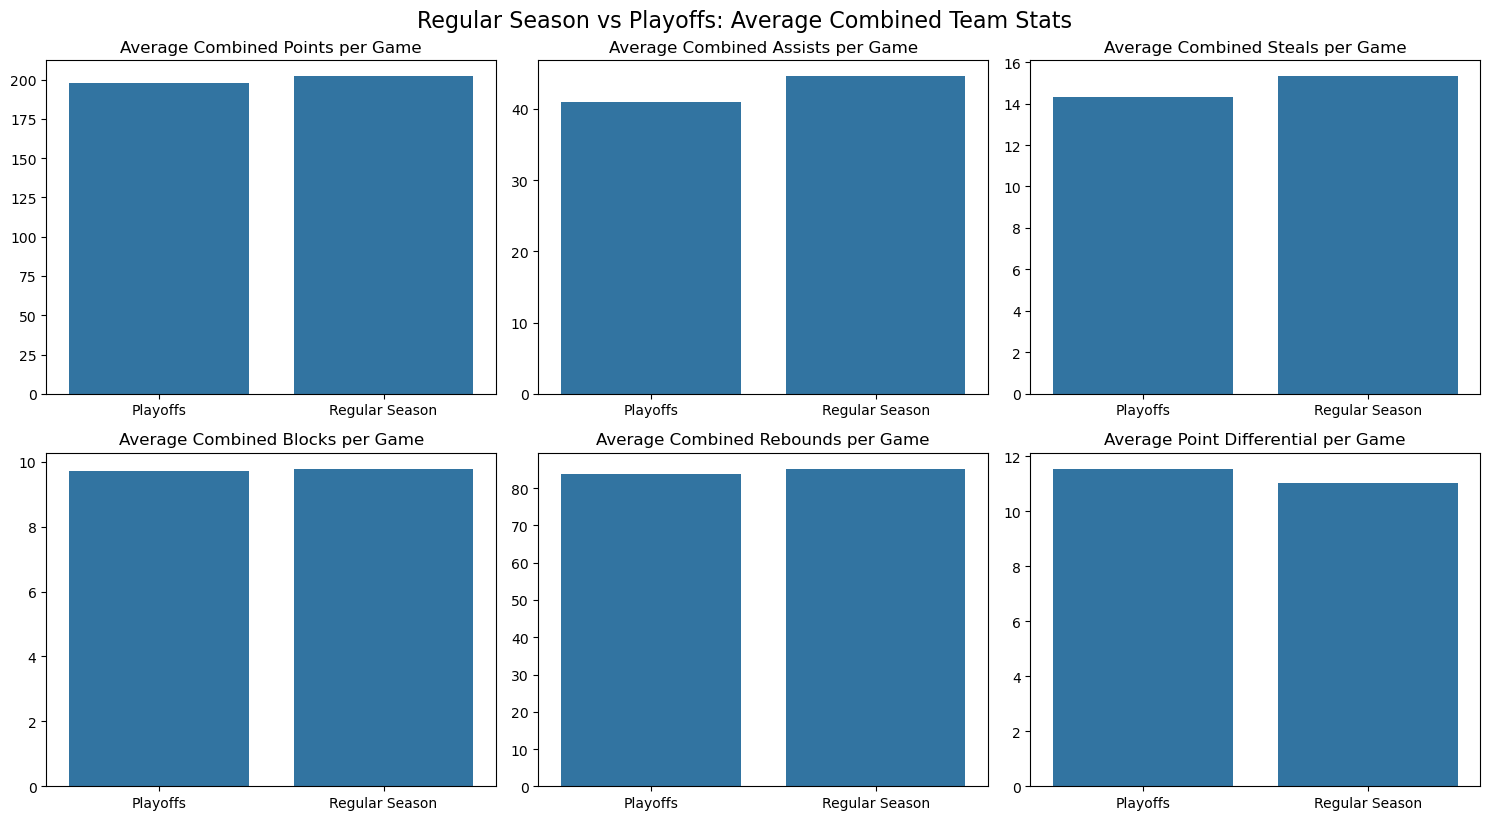

In [139]:
# Group means
avg_stats = game_df_filter3.groupby('season_type')[
    ['combined_pts', 'combined_ast', 'combined_stl', 'combined_blk', 'combined_reb','pt_diff']
].mean().reset_index()

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

stat_columns = [
    ('combined_pts', 'Average Combined Points per Game'),
    ('combined_ast', 'Average Combined Assists per Game'),
    ('combined_stl', 'Average Combined Steals per Game'),
    ('combined_blk', 'Average Combined Blocks per Game'),
    ('combined_reb', 'Average Combined Rebounds per Game'),
    ('pt_diff', 'Average Point Differential per Game')
]

for i, (stat, title) in enumerate(stat_columns):
    sns.barplot(data=avg_stats, x='season_type', y=stat, ax=axes[i])
    axes[i].set_title(title)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.suptitle('Regular Season vs Playoffs: Average Combined Team Stats', fontsize=16, y=1.02)
plt.show()


Additionally, blowouts happen more often in the playoffs than in the regular season, and are much more brutal too, as the average point differential across playoff games are significantly higher than across regular season games.



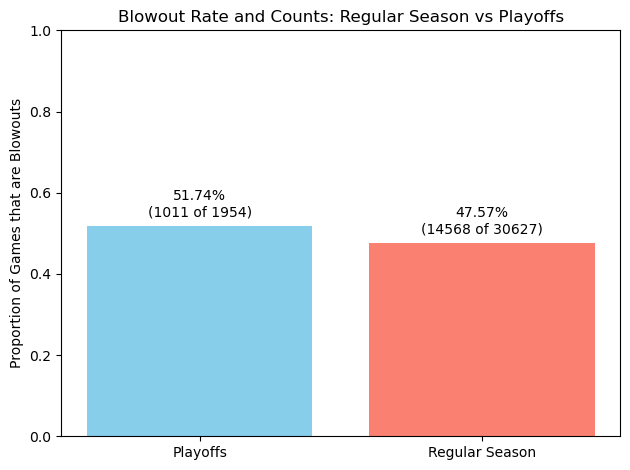

In [164]:
blowout_counts = game_df_filter3.groupby('season_type')['is_blowout'].agg(['sum', 'count'])
blowout_counts['blowout_rate'] = blowout_counts['sum'] / blowout_counts['count']
blowout_counts = blowout_counts.reset_index()

# Assign colors
bar_colors = ['skyblue', 'salmon']  # [Regular Season, Playoffs]

# Create bar plot
fig, ax = plt.subplots()
bars = ax.bar(
    x=blowout_counts['season_type'],
    height=blowout_counts['blowout_rate'],
    color=bar_colors
)

# Annotate each bar with both % and count
for i, bar in enumerate(bars):
    height = bar.get_height()
    count = blowout_counts.iloc[i]['sum']
    total = blowout_counts.iloc[i]['count']
    ax.annotate(
        f'{height:.2%}\n({int(count)} of {int(total)})',
        xy=(bar.get_x() + bar.get_width() / 2, height),
        xytext=(0, 5),
        textcoords='offset points',
        ha='center', va='bottom'
    )

# Labels and title
ax.set_title('Blowout Rate and Counts: Regular Season vs Playoffs')
ax.set_ylabel('Proportion of Games that are Blowouts')
ax.set_ylim(0, 1)
ax.set_xlabel('')

plt.tight_layout()
plt.show()


Based on these, it can be inferred that playoff mode is not really a thing, at least in a team-based statistical perspective. Playoff games aren't often intense as blowouts happen more often and are much more egregious beatdowns. 

### Conclusion:

In this activity, I was able to learn about different methods in visualizing data, as well as review about data wrangling using pandas. I was able to understand the use cases for histograms, boxplots, scatter plots, and bar graphs, and will help me to use each of them for the right circumstance when it comes to visualizing data in the future. In the supplementary activity, I was also able to explore a lot of functionalities of pandas to achieve the data I want to interpret and visualize. 

Overall, this activity was quite a good refresher course for what I have learned in the past.